In [20]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

#Downloading Data

In [21]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True,transform=transforms.ToTensor())
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


# Data Loader

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
'''for i,l in zip(images,labels):
  npimg = i.numpy()
  npimg = np.transpose(npimg, (1, 2, 0))
  plt.figure(figsize = (1,1))
  plt.imshow(npimg)
  plt.show()
  print(classes[l.item()])'''

# LeNet CNN Architecture

In [19]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

#Accuracy Evaluation

In [32]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = ln(inputs)
        _, pred = torch.max(outputs.data, 1)        
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    
    return 100 * correct / total

#Training and Testing Module

In [36]:
def train(model,epochs=16):
  loss_fn = nn.CrossEntropyLoss()
  opt = optim.Adam(model.parameters())
  loss_epoch_arr=[]
  for epoch in range(epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()        
        
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, evaluation(testloader), evaluation(trainloader)))
  plt.plot(loss_epoch_arr)
  plt.show()
    
    


Epoch: 0, Test acc: 39.55, Train acc: 39.20
Epoch: 1, Test acc: 43.29, Train acc: 43.69
Epoch: 2, Test acc: 46.85, Train acc: 47.71
Epoch: 3, Test acc: 48.64, Train acc: 50.18
Epoch: 4, Test acc: 50.52, Train acc: 51.84
Epoch: 5, Test acc: 51.97, Train acc: 54.45
Epoch: 6, Test acc: 53.13, Train acc: 56.72
Epoch: 7, Test acc: 53.70, Train acc: 57.56
Epoch: 8, Test acc: 54.47, Train acc: 59.16
Epoch: 9, Test acc: 54.95, Train acc: 60.17
Epoch: 10, Test acc: 55.05, Train acc: 60.88
Epoch: 11, Test acc: 55.18, Train acc: 62.03
Epoch: 12, Test acc: 55.23, Train acc: 62.81
Epoch: 13, Test acc: 55.10, Train acc: 63.27
Epoch: 14, Test acc: 55.69, Train acc: 64.01
Epoch: 15, Test acc: 55.32, Train acc: 64.16


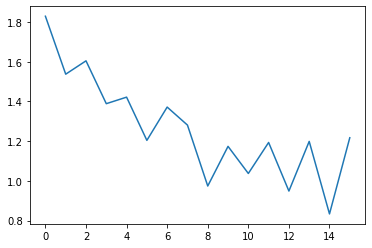

In [37]:
ln=LeNet()
train(ln)